<a href="https://colab.research.google.com/github/yogaprastiya/perkuliahanPNJ/blob/main/materi_kuliah_bigdata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Pengenalan Big Data



Kita akan membangun model untuk memprediksi harga rumah di California menggunakan data Sensus California yang terdiri dari metrik seperti populasi, pendapatan median, harga rumah rata-rata, dan lainnya untuk setiap grup blok di California yang biasanya terdiri dari populasi dari 600 hingga 3.000. Tujuan akhir dari proyek ini adalah untuk membangun mesin prediksi yang mampu memprediksi harga perumahan rata-rata distrik. Kami tahu bahwa ini adalah masalah pembelajaran yang diawasi karena kumpulan data kami terdiri dari pengamatan berlabel dan sepertinya regresi multivariat harus menjadi pilihan kami, tetapi kami akan mengeksplorasi berbagai cara untuk membangun model dan akhirnya memilih satu dengan tingkat kesalahan RMSE terendah ( Root Mean Square Error) atau MAE (Mean Absolute Error) atau metrik lain yang kami pilih.

Impor library untuk pengolahan data numerik dan statistik dalam python

In [2]:
import sklearn
import numpy as np
import os
import seaborn as sns
import pandas as pd

Import librari untuk menampilkan grafik

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

Baca data perumahaan

In [3]:
housing= pd.read_csv("data_rumah.csv")

Tampilkan fitur data berdasarkan jenis tabelnya

In [4]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Tampilkan informasi statistik dari data

In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Tampilkan data rumah berdasarkan jarak dari pantai

In [6]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

Tampilkan dalam bentuk histogram

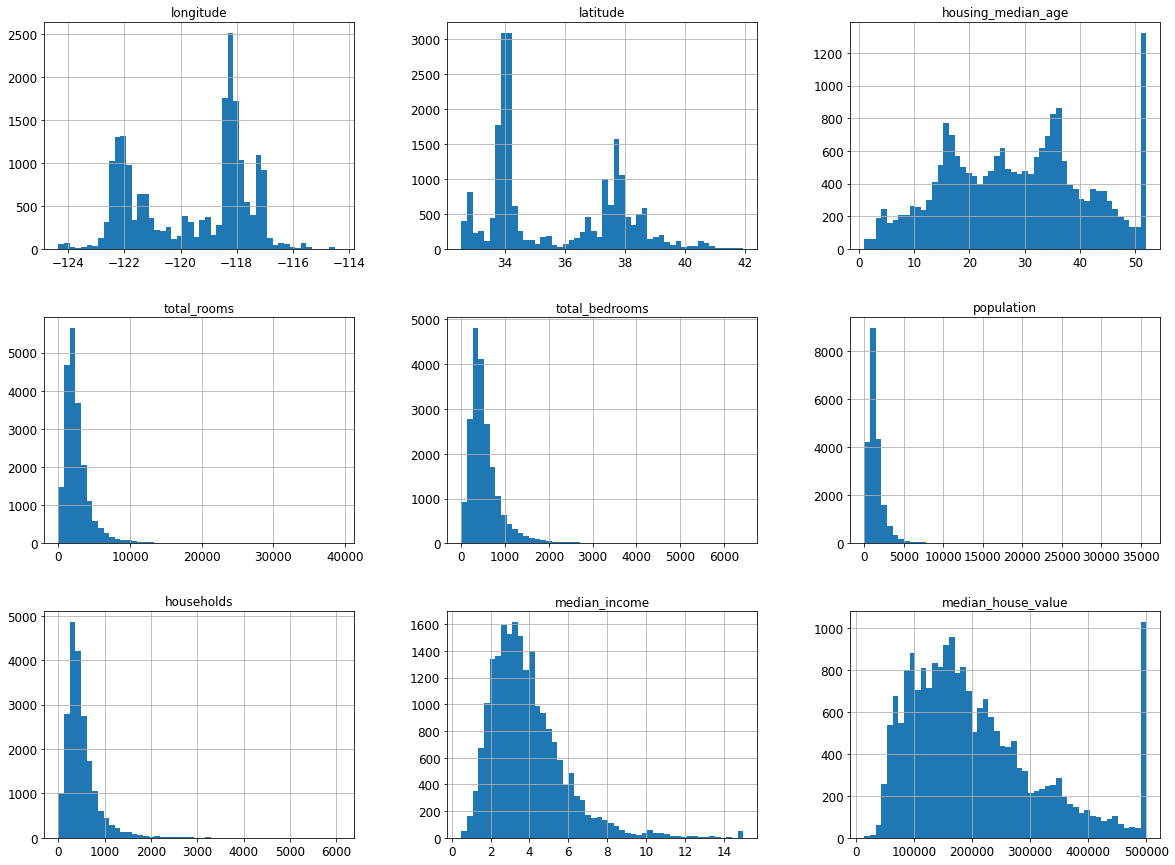

In [8]:
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

Tampilkan rumah berdasarkan tingkat pendapatan

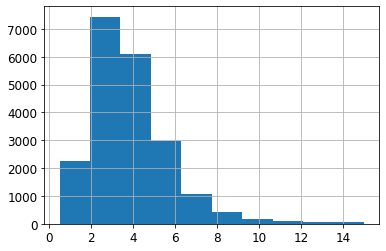

In [9]:
housing["median_income"].hist()

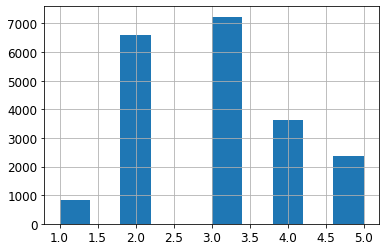

In [10]:
housing["income_cat"]= pd.cut(housing["median_income"],
                             bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                             labels= [1,2,3,4,5])
housing["income_cat"].hist()

Mendetailkan tingkat pendapatan kedalam beberapa level pendapatan

In [11]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

Memeriksa distribusi tingkat pendapatan berdasarkan level pendapatan

In [12]:
housing["income_cat"].value_counts() / len(housing)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [13]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

Visualisasi dan explorasi data

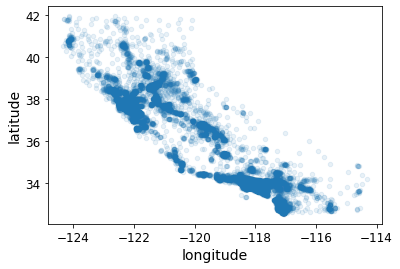

In [14]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

Membandingkan kepadatan populasi dan harga rumah


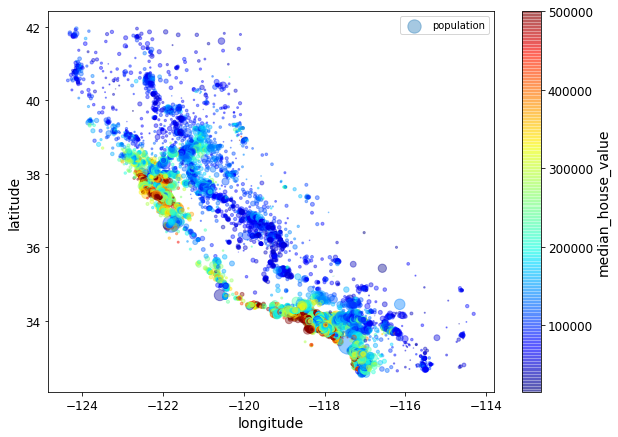

In [15]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
            s=housing["population"]/100, label="population", figsize=(10,7),
            c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True, sharex=False)
plt.legend()

Mengkorelasikan harga rumah dengan tingkat kepadatan

In [16]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbb21c56fd0>,
      dtype=object)

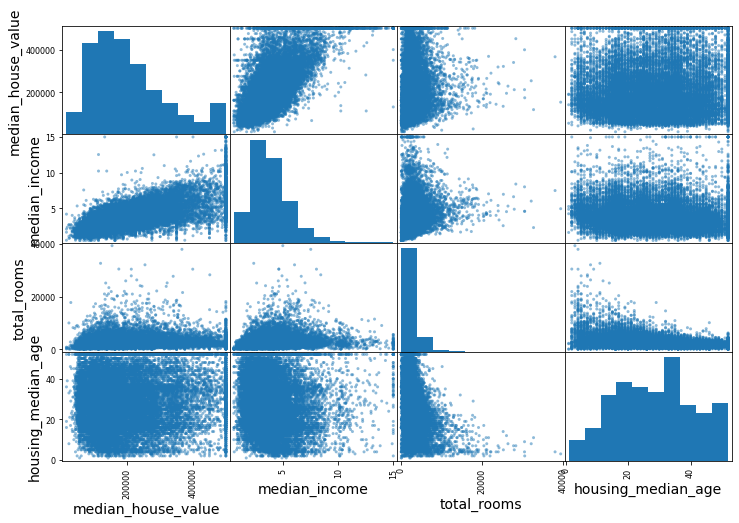

In [22]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms","housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))


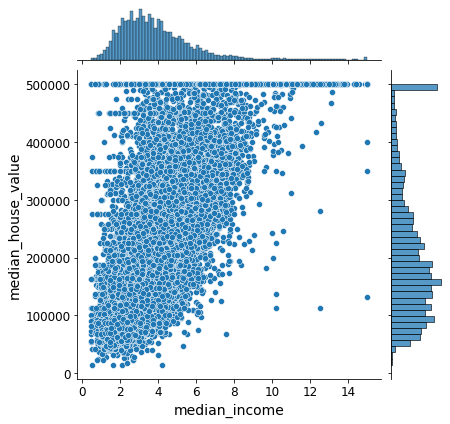

In [23]:
sns.jointplot(x="median_income", y="median_house_value", data=housing)

Memasukan data ke dalam machine learning

In [24]:
housing= strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

Membersihkan tabel rumah dari data yang hilang

In [25]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [26]:
housing_num = housing.drop("ocean_proximity", axis=1)

In [27]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [28]:
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155,    3.     ])

In [29]:
housing_num.median().values

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

Transformasi variabel kategori

In [36]:
X = imputer.transform(housing_num)

In [37]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns)

In [38]:
housing_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   income_cat          16512 non-null  float64
dtypes: float64(9)
memory usage: 1.1 MB


In [34]:
from sklearn.preprocessing import OneHotEncoder

In [35]:
cat_encoder = OneHotEncoder(sparse=False)

In [40]:
housing_cat_1hot = cat_encoder.fit_transform(housing_tr)

In [41]:
housing_cat_1hot

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [42]:
cat_encoder.categories_

[array([-124.35, -124.3 , -124.27, -124.26, -124.25, -124.23, -124.22,
        -124.21, -124.19, -124.18, -124.17, -124.16, -124.15, -124.14,
        -124.13, -124.11, -124.1 , -124.09, -124.08, -124.07, -124.06,
        -124.05, -124.03, -124.02, -124.  , -123.98, -123.96, -123.92,
        -123.88, -123.85, -123.84, -123.83, -123.82, -123.81, -123.8 ,
        -123.79, -123.78, -123.75, -123.74, -123.73, -123.72, -123.7 ,
        -123.69, -123.68, -123.66, -123.64, -123.63, -123.59, -123.58,
        -123.54, -123.53, -123.52, -123.49, -123.48, -123.47, -123.43,
        -123.41, -123.4 , -123.39, -123.38, -123.37, -123.36, -123.35,
        -123.34, -123.32, -123.28, -123.26, -123.24, -123.23, -123.22,
        -123.21, -123.2 , -123.19, -123.18, -123.17, -123.16, -123.15,
        -123.13, -123.12, -123.11, -123.1 , -123.08, -123.07, -123.04,
        -123.03, -123.02, -123.01, -123.  , -122.97, -122.96, -122.95,
        -122.94, -122.93, -122.92, -122.91, -122.9 , -122.89, -122.88,
      

Kita dapat melihat bahwa sekarang tidak ada nilai yang hilang. Sekarang, saatnya untuk menangani kedekatan atribut teks dengan lautan dan mengubahnya menjadi angka sehingga kami dapat memasukkannya ke dalam model ML. Kami akan menggunakan satu teknik pengkodean panas untuk ini.

In [43]:
from sklearn.base import BaseEstimator, TransformerMixin

In [44]:
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

Sekarang, kita akan menulis fungsi/transformator khusus untuk menambahkan atribut tambahan yang telah kita bahas sebelumnya di kumpulan data. Menulis trafo khusus membantu penyetelan parameter hiper otomatis. Kode di bawah ini memiliki satu parameter hyper, add_bedrooms_per_room, disetel ke True secara default. Yang akan membantu kita untuk menentukan apakah menambahkan atribut ini akan membantu model atau tidak.

In [45]:
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
      self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

Tambahkan atribut kembali ke dataset

In [46]:
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(housing.columns)+["rooms_per_household", "population_per_household"])
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat,rooms_per_household,population_per_household
0,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND,2,5.485836,3.168555
1,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN,5,6.927083,2.623698
2,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.875,INLAND,2,5.393333,2.223333
3,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN,2,3.886128,1.859213
4,-118.7,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN,3,6.096552,3.167241


Model ML tidak berperforma baik saat fitur input berada dalam skala yang berbeda. Jadi, kita akan menstandardisasi semua fitur numerik kecuali untuk variabel target.

In [47]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])
housing_num_tr = num_pipeline.fit_transform(housing_num)
housing_num_tr

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.01739526,
         0.00622264, -0.12112176],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.56925554,
        -0.04081077, -0.81086696],
       [ 0.26758118, -0.1259716 ,  1.22045984, ..., -0.01802432,
        -0.07537122, -0.33827252],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ..., -0.5092404 ,
        -0.03743619,  0.32286937],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.32814891,
        -0.05915604, -0.45702273],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.01407228,
         0.00657083, -0.12169672]])

Transformasi variabel kategori

In [48]:
from sklearn.compose import ColumnTransformer
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])
housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared.shape

(16512, 17)

Training model ML dengan :
1. Linear Regression

In [50]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)
some_data = housing.iloc[:5] 
some_labels = housing_labels.iloc[:5] 
some_data_prepared = full_pipeline.transform(some_data)  
print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [ 83811.08312039 314388.27147935 145641.85902864 183704.64921202
 238729.66725745]


Komparasikan dengan data aktual

In [51]:
print("Labels:", list(some_labels))

Labels: [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


Dalam contoh pertama, model kami turun sekitar $76.000. Mari kita ukur RMSE dari model regresi.

In [53]:
from sklearn.metrics import mean_squared_error  
housing_predictions = lin_reg.predict(housing_prepared) 
lin_mse = mean_squared_error(housing_labels, housing_predictions) 
lin_rmse = np.sqrt(lin_mse) 
lin_rmse

68376.51254853733

RMSE memberi tahu kita bahwa model memiliki kesalahan prediksi tipikal $68.628 yang cukup besar. Kita bisa mencoba menambahkan lebih banyak fitur atau mencoba model yang lebih kompleks untuk membuat model lebih akurat. Sebagai bagian dari proyek ini, kami akan mencoba model yang lebih kompleks.


2. Decision Tree

In [54]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(random_state=42)

In [55]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

Ada yang tidak beres karena modelnya tidak bisa 100% akurat. Karena, kita tidak ingin menyentuh set data pengujian sampai kita menemukan model akhir, mari gunakan teknik validasi silang 10 kali lipat untuk membagi set pelatihan menjadi set pelatihan dan validasi lebih lanjut.

In [56]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

Hasil keputusan decision setelah validasi silang

In [57]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [72237.45096271 69208.53094621 69286.11573206 70612.13634405
 70577.30202088 76840.97092314 71823.83279699 72710.22512908
 67780.77127665 71678.17802175]
Mean: 71275.55141535088
Standard deviation: 2362.02756776275


Sekarang, kita dapat melihat bahwa regresi linier bahkan lebih baik daripada decision tree yang memiliki kesalahan rata-rata $71.407 dengan standar deviasi +- $2.439 dibandingkan dengan $68.628 RMSE dari regresi linier. Mari kita cari tahu apa yang akan menjadi RMSE jika kita menerapkan validasi silang 10 kali lipat dalam regresi juga.

In [58]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [71523.78333874 64044.46774989 67454.97869698 68514.10137273
 66303.62531226 72166.63405138 74464.08841381 68570.11804395
 66063.64175868 69870.86192291]
Mean: 68897.63006613276
Standard deviation: 3002.746127534861


Jadi, regresi linier kita memang lebih baik daripada pohon keputusan untuk masalah yang kami miliki karena regresi linier masih memiliki kesalahan rata-rata hanya $69.000 dibandingkan dengan $71.000 untuk pohon keputusan.

3. Random Forest

Random forest bekerja dengan membangun banyak pohon pada subset fitur acak dan membuat rata-rata prediksinya.

In [59]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(random_state=42)

Mari kita lihat RMSE random forest pada set data training

In [61]:
housing_predictions = forest_reg.predict(housing_prepared) 
forest_mse = mean_squared_error(housing_labels, housing_predictions) 
forest_rmse = np.sqrt(forest_mse) 
forest_rmse

18675.224916252282

Itu berarti kesalahan prediksi model hanya $18.603 pada set pelatihan. Apakah kita akan mendapatkan hasil yang berbeda jika kita menggunakan validasi silang pada metode random forest?

In [62]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [51553.65292335 48797.89565614 47005.23947642 52046.73567245
 47700.78025873 51824.08544879 52582.59165129 49949.79025967
 48680.25622229 54019.67674791]
Mean: 50416.070431704204
Standard deviation: 2201.612779754884


Tidak buruk, sejauh ini salah satu model terbaik dengan tingkat kesalahan $50.182 meskipun kita melihat bahwa tingkat kesalahan cukup tinggi dalam validasi dataset dibandingkan dengan set training yang menunjukkan mungkin ada masalah pemasangan yang berlebihan. Mari kita coba satu model terakhir sebelum memulai dengan baik menyetel model terakhir kami.

5.Support Vector Machine

In [63]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(housing_prepared, housing_labels)
housing_predictions = svm_reg.predict(housing_prepared)
svm_mse = mean_squared_error(housing_labels, housing_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

106873.526604078

RMSE dari $111,094 aturan support vector machine dari pertimbangan akhir.

6. Fine Tuning Model

Kita akan menyempurnakan model kami menggunakan teknik pencarian grid. Di mana kita perlu memberi tahu parameter hiper mana yang ingin kita uji dan nilai apa yang harus dicoba, dan teknik pencarian kisi akan mengevaluasi semua kemungkinan kombinasi nilai parameter hiper, menggunakan validasi silang.

In [64]:
from sklearn.model_selection import GridSearchCV
param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]
forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [65]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

64794.30269596007 {'max_features': 2, 'n_estimators': 3}
56170.628706376316 {'max_features': 2, 'n_estimators': 10}
53112.07892952066 {'max_features': 2, 'n_estimators': 30}
61836.14128922096 {'max_features': 4, 'n_estimators': 3}
54015.050600771814 {'max_features': 4, 'n_estimators': 10}
51501.312925751794 {'max_features': 4, 'n_estimators': 30}
59654.781331729675 {'max_features': 6, 'n_estimators': 3}
52654.921131020776 {'max_features': 6, 'n_estimators': 10}
50743.74265388978 {'max_features': 6, 'n_estimators': 30}
60051.26348940765 {'max_features': 8, 'n_estimators': 3}
52909.31100796091 {'max_features': 8, 'n_estimators': 10}
50800.78516244517 {'max_features': 8, 'n_estimators': 30}
63176.30025923348 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54596.210174483705 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60999.682580275425 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
53236.2602917408 {'bootstrap': False, 'max_features': 3, 'n_estimator

Kita melihat bahwa kombinasi 8 fitur dan 30 estimator memberikan RMSE terendah $49.682. Ketika masalah dan data yang ada sangat besar, biasanya disarankan untuk menggunakan pencarian acak daripada pencarian grid seperti di bawah ini.

In [66]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }
forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(housing_prepared, housing_labels)
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

49799.635737761106 {'max_features': 7, 'n_estimators': 180}
52293.114093913726 {'max_features': 5, 'n_estimators': 15}
51327.353255586764 {'max_features': 3, 'n_estimators': 72}
51528.97117998048 {'max_features': 5, 'n_estimators': 21}
49958.42482333546 {'max_features': 7, 'n_estimators': 122}
51270.531241462595 {'max_features': 3, 'n_estimators': 75}
51172.437672640175 {'max_features': 3, 'n_estimators': 88}
50255.14987044715 {'max_features': 5, 'n_estimators': 100}
50894.38729795359 {'max_features': 3, 'n_estimators': 150}
65022.070435017646 {'max_features': 5, 'n_estimators': 2}


Untuk tujuan proyek ini, kita akan tetap menggunakan pencarian grid. Sekarang, saatnya menganalisis model terbaik dan kesalahannya. Mari kita mulai dengan melihat pentingnya fitur dalam model random forest.

In [67]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.24372815503486656, 'median_income'),
 (0.164552239433468, 'income_cat'),
 (0.11302701921836562, 'INLAND'),
 (0.1006015031515756, 'pop_per_hhold'),
 (0.06764458085326612, 'longitude'),
 (0.062474488288322035, 'latitude'),
 (0.055692542877701014, 'bedrooms_per_room'),
 (0.051531212925316115, 'rooms_per_hhold'),
 (0.04483496644921273, 'housing_median_age'),
 (0.019604628363310554, 'population'),
 (0.018269242313755225, 'total_rooms'),
 (0.018134587277114467, 'households'),
 (0.01784419116603477, 'total_bedrooms'),
 (0.013907738567035368, '<1H OCEAN'),
 (0.005377247230746392, 'NEAR OCEAN'),
 (0.0026876599298535937, 'NEAR BAY'),
 (8.799692005595001e-05, 'ISLAND')]

Langkah ini memberikan kesempatan kepada kita untuk memahami fitur mana yang paling penting dan mana yang kurang penting, yaitu kandidat yang dapat dibatalkan. Seperti yang kita lihat sebelumnya, pendapatan rata-rata adalah fitur teratas untuk model ini.

Evaluasi model pada set training

Ini saatnya untuk mengevaluasi model random forest pada set pengujian dan menerapkannya ke dalam produksi.

In [68]:
final_model = grid_search.best_estimator_
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()
X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

48557.33618531538

RMSE 47.730 sangat bagus , jadi ini adalah model terakhir kita. Dan kita akan menerapkan model random forest ini ke dalam produksi. Menghitung interval prediksi model selalu merupakan ide yang baik karena membuat kita sadar seberapa besar kesalahan dapat berfluktuasi.

In [70]:
from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,loc=squared_errors.mean(),scale=stats.sem(squared_errors)))

array([46608.81069751, 50430.63116986])

Ini memberi tahu kita bahwa kesalahan prediksi dapat berfluktuasi di mana saja antara $45.685 hingga $49.691. Kesenjangan sekitar $4,000 dalam interval kepercayaan adalah sesuatu yang bisa kita jalani. Jadi, ini adalah model terakhir kami.

Kesimpulan dan Saran